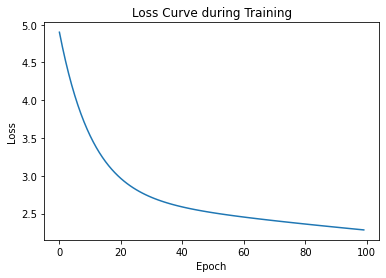

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.rand(100, 5)
y = 2 * x[:, 0] + 3 * x[:, 1] - 1 * x[:, 2] + 0.5 * x[:, 3] - 2.5 * x[:, 4] + np.random.randn(100)

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)


class LinearRegression(nn.Module):
    def __init__(self, input_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)


model = LinearRegression(5)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

losses = []
epochs = 100
for epoch in range(epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve during Training')
plt.show()